## Hotel Booking Analysis

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. This dataset contains 31 features about booking information such as Average Daily Rate, Arrival Time, Room Type, Special Request, etc. between 2015 and 2017 years. The goal of this project is to compare the performance of different ML classifiers on this dataset.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
#import plotly.offline as pyo
#Set notebook mode to work in offline
#pyo.init_notebook_mode()

In [2]:
# Import Data
hotel_data = pd.read_csv('hotel_bookings.csv')
hotel_data.head()
# At a hotel, the time taken between when a customer makes a reservation and their actual arrival is called the Lead Time

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# data summary
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### 1. Feature Engineering

In [4]:
hotel_type = hotel_data.groupby(['hotel'])['hotel'].count()
hotel_type

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [5]:
# using plotly to plot hotel type for comparsion
#bar = go.Bar(x=hotel_type.index, y=hotel_type.values)
#fig = go.Figure(bar)
#fig.update_layout(title='Hotel Types',
#                 xaxis_title = 'Number of Hotels',
#                 yaxis_title = 'Count' 
#                 )
#fig.show()

Text(0, 0.5, 'Count')

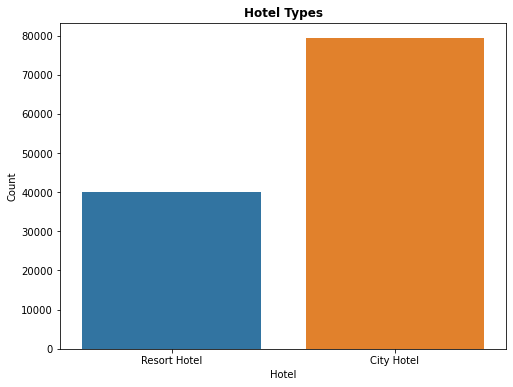

In [6]:
# using seaborn
plt.figure(figsize=(8,6))
sns.countplot(x='hotel', data = hotel_data)
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel')
plt.ylabel('Count')

In [7]:
canc_cnt = hotel_data.groupby(['is_canceled'])['is_canceled'].count()

# calculate the cancelation rate
canc_rate = canc_cnt/len(hotel_data)
canc_rate

is_canceled
0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

It is calculated that 37% of bookings are canceled, 63% of bookings are not canceled.

In [8]:
# using plotly to plot cancelation rate
#bar = go.Bar(x=canc_rate.index, y=canc_rate.values*100)
#fig = go.Figure(bar)
#fig.update_layout(title='Cancelation Rate',
#                 xaxis_title = 'Canceled / Not Canceled',
#                 yaxis_title = 'Cancelation Rate %' 
#                 )
#fig.show()

Text(0, 0.5, 'Cancelation Rate')

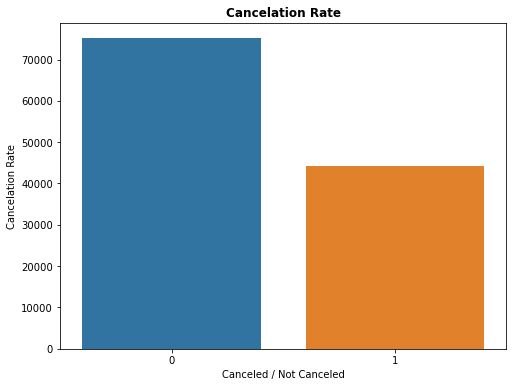

In [9]:
# using seaborn
plt.figure(figsize=(8,6))
sns.countplot(x='is_canceled', data = hotel_data)
plt.title('Cancelation Rate', weight='bold')
plt.xlabel('Canceled / Not Canceled')
plt.ylabel('Cancelation Rate')

### Violin Plot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

Source: Seaborn Documentation

Text(0, 0.5, 'Lead Time')

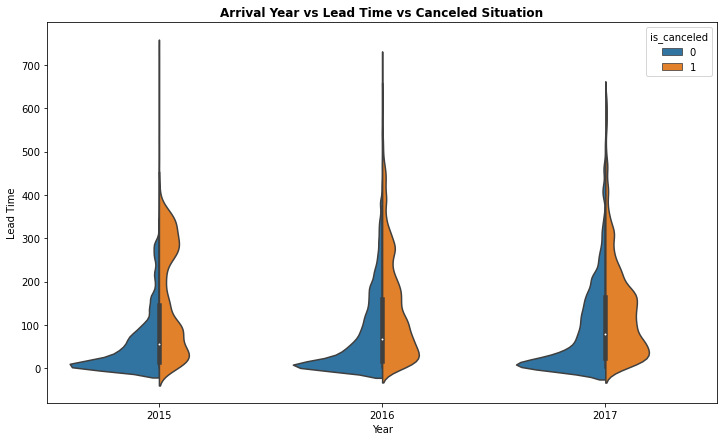

In [10]:
plt.figure(figsize=(12,7))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=hotel_data, split = True)
plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year')
plt.ylabel('Lead Time')

The above graph shows the relationship for 'Arrival Year vs Lead Time vs Canceled Situation'.
The violin plot cantains three years of data. The shapes of 'canceled' of the distributions are quite different from year to year. However, the distribution of not-canceled booking are almost the same.

In [11]:
plt.figure(figsize=(12, 7))
cnt = hotel_data.groupby(['arrival_date_month'])['arrival_date_month'].count()
cnt

arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: arrival_date_month, dtype: int64

<Figure size 864x504 with 0 Axes>

Text(0, 0.5, 'Count')

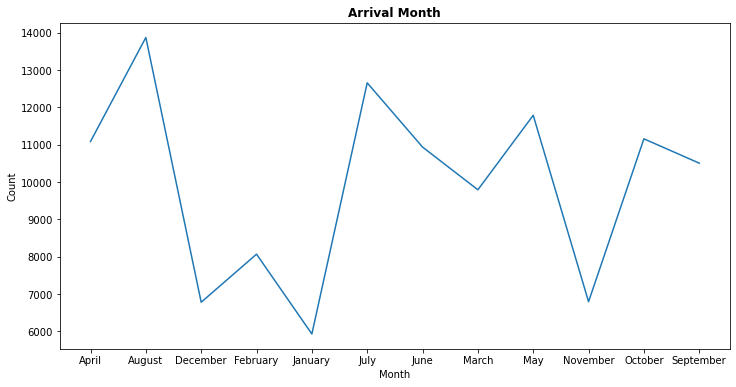

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=cnt.index, y=cnt.values, sort=True)
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month')
plt.ylabel('Count')

The above graph shows the total number of bookings for each month in three years. August and July are the busiest two months and January is the most unoccupied month. This is reasonable because most people will go for traveling during summer.

In [13]:
# plotly express
#fig = px.line(cnt, x = cnt.index, y = cnt.values)
#fig.update_layout(title='Arrival Month',
#                 xaxis_title = 'Month',
#                 yaxis_title = 'Count' 
#                 )
#fig.show()

Text(0, 0.5, 'Count')

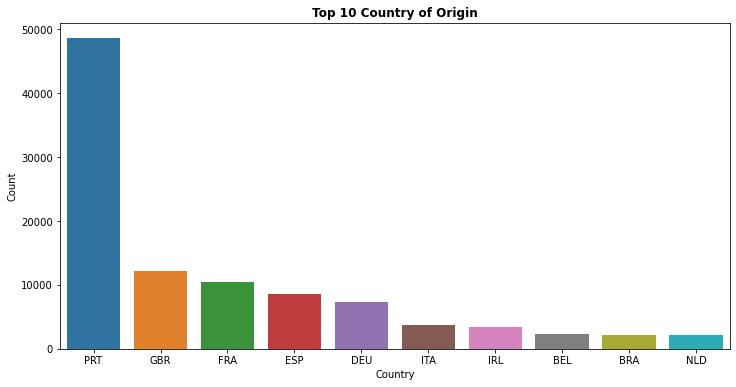

In [14]:
# Create Top 10 Country of Origin graph (Seaborn)
plt.figure(figsize=(12,6))
sns.countplot(x='country', data=hotel_data, 
              order=pd.value_counts(hotel_data['country']).iloc[:10].index)
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country')
plt.ylabel('Count')

In [15]:
country_cnt = hotel_data.groupby(['country'])['country'].count().sort_values(ascending=False).iloc[:10]
country_cnt

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

In [16]:
# Create Top 10 Country of Origin graph (Plotly)
#fig = px.bar(country_cnt, x=country_cnt.index, y=country_cnt.values)
#fig.update_layout(title='Top 10 Country of Origin',
#                 xaxis_title = 'Country',
#                 yaxis_title = 'Count' 
#                 )
#fig.show()

Text(0, 0.5, 'Count')

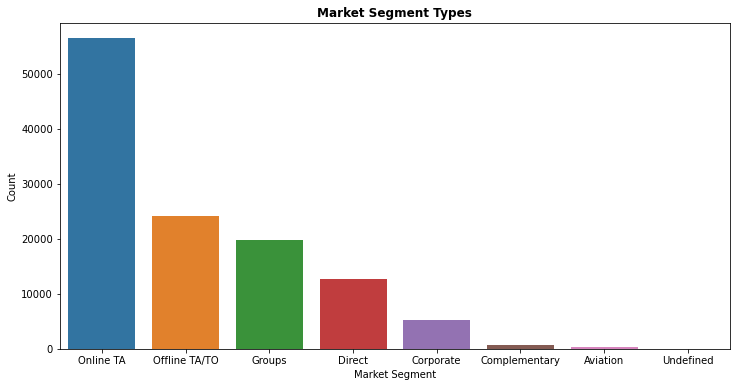

In [17]:
# Market_segment feature exploration
plt.figure(figsize=(12,6))
sns.countplot(hotel_data['market_segment'], order=pd.value_counts(hotel_data['market_segment']).index)
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Count')

Most of the customers booked their hotels through online travel agents, followd by groups.

Text(0, 0.5, 'Count')

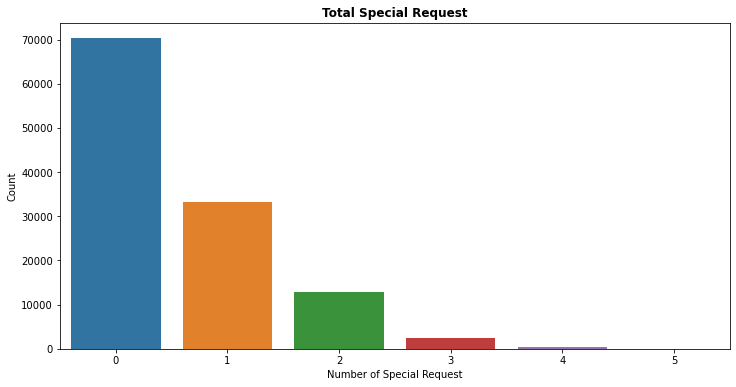

In [18]:
# total_of_special_requests graph
plt.figure(figsize=(12,6))
sns.countplot(x='total_of_special_requests', data=hotel_data)
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request')
plt.ylabel('Count')

In [19]:
hotel_data['meal'].value_counts()                            

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

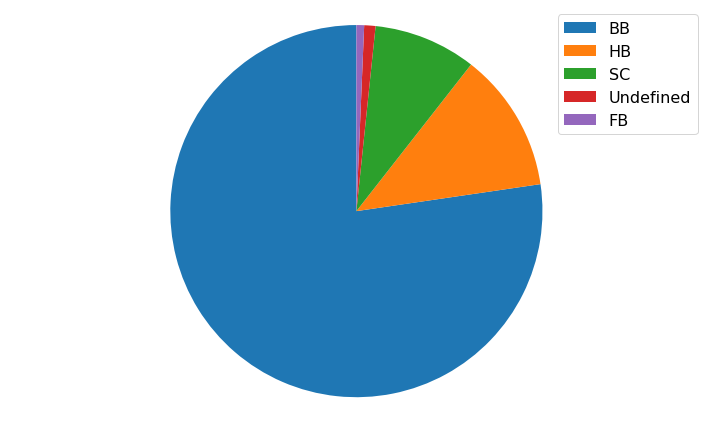

In [20]:
# Meal feature pie chart
plt.figure(figsize=(10,6))
labels = ['BB', 'HB', 'SC', 'Undefined', 'FB']
size = hotel_data['meal'].value_counts()
patches, texts = plt.pie(size, startangle=90)
plt.legend(patches, labels, loc="best", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

### 2. Data Cleaning and Preparation

In [21]:
# Display sum of null data
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [22]:
def missing_values_table(df):
        #1 Total missing values
        mis_val = df.isnull().sum()
        
        #2 Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #3 Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        #4 Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        #5 Only keep the columns with missing values
        mis_val_table_only = mis_val_table_ren_columns.loc[mis_val_table_ren_columns['% of Total Values'] > 0]
        
        #6 Return the dataframe with missing information
        return mis_val_table_only

In [23]:
missing = missing_values_table(hotel_data)
missing

,Missing Values,% of Total Values
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


In [24]:
hotel_data["agent"].value_counts().count()

333

In [25]:
hotel_data["agent"].dtypes

dtype('float64')

94.3% of company column are missing. Therefore we do not have enough information to fill the rows of company column. Thus this column will be dropped. Only 13.68% of agent column are missing, but there are still 16340 missing values there, those missing may contain lots of information. It has a lot of class (333) inside of it otherwise we could try predicting missing values but they may misguide the predictions.

In [26]:
# find columns with missing > 10%
missing_columns = list(missing.index[missing['% of Total Values'] > 10])
missing_columns

['agent', 'company']

In [27]:
# drop these columns
hotel_data = hotel_data.drop(columns = missing_columns)

We have 4 missing values in children column. If there is no information about children, I am assuming they have no children.

In [28]:
hotel_data.groupby(['children'])['children'].count()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [29]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(hotel_data[['children']])
hotel_data['children'] = imp.transform(hotel_data[['children']])

In [30]:
# check the children column again
hotel_data['children'].isnull().sum()

0

Less than 1% of country rows are missing, I will delete the NA rows of country column

In [31]:
country_empty = hotel_data.loc[hotel_data['country'].isnull()]
country_empty

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,A,2,No Deposit,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,A,0,No Deposit,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,A,0,No Deposit,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,A,0,No Deposit,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,A,0,No Deposit,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [32]:
hotel_data.drop(country_empty.index, inplace=True)
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [33]:
# check for missing values again
re_missing=missing_values_table(hotel_data)
re_missing

,Missing Values,% of Total Values


No more data is missing.

In [34]:
hotel_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

Most machine learning models unfortunately cannot deal with categorical variables, for better analyzing the data, categorical labels need to be converted into numerical values. This will help to be more understandable and implementable into machine learning algorithms.

In [35]:
hotel_data['country'].nunique()

177

In [36]:
# Using Label Encoder method for categorical features
from sklearn.preprocessing import LabelEncoder

In [37]:
labelencoder = LabelEncoder()

def cate_convert(df):
    for col in df.columns: 
        if df[col].dtype == 'object':
            df[col] = labelencoder.fit_transform(df[col])
    return df

In [38]:
hotel_data = cate_convert(hotel_data)
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,2,3,0,0,2,0.00,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,2,4,0,0,2,0.00,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,2,0,0,0,2,75.00,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,2,75.00,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,2,98.00,0,1,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,0,0,0,2,96.14,0,0,1,919
119386,0,0,102,2017,1,35,31,2,5,3,...,4,0,0,0,2,225.43,0,2,1,920
119387,0,0,34,2017,1,35,31,2,5,2,...,3,0,0,0,2,157.71,0,4,1,920
119388,0,0,109,2017,1,35,31,2,5,2,...,0,0,0,0,2,104.40,0,0,1,920


In [39]:
hotel_data.dtypes

hotel                               int32
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int32
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int32
country                             int32
market_segment                      int32
distribution_channel                int32
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int32
assigned_room_type                  int32
booking_changes                     int64
deposit_type                        int32
days_in_waiting_list              

### 3. Correlation Analysis

In [40]:
correlations = hotel_data.corr()['is_canceled'].sort_values()
correlations

reservation_status               -0.917228
total_of_special_requests        -0.235595
required_car_parking_spaces      -0.194801
assigned_room_type               -0.175882
reservation_status_date          -0.163023
booking_changes                  -0.144669
hotel                            -0.133990
is_repeated_guest                -0.085185
customer_type                    -0.068698
reserved_room_type               -0.062228
previous_bookings_not_canceled   -0.055495
babies                           -0.032523
meal                             -0.018679
arrival_date_day_of_month        -0.006173
stays_in_weekend_nights          -0.002639
arrival_date_month               -0.001800
children                          0.004740
arrival_date_week_number          0.007481
arrival_date_year                 0.016339
stays_in_week_nights              0.024103
adr                               0.046133
days_in_waiting_list              0.054008
market_segment                    0.056972
adults     

The above correlation analysis shows positive or negative relationships between them. The reservation_ status feature is drawn more attention because of its negative correlation with the is_canceled feature. By keeping reservation_status in data, it is possible to achieve 100% accuracy rate because that feature is direct way to predict cancellations, its like cheating. For the sake of analysis I will drop reservation_status and continue analysis without it.
Last feature is reservation_status_date. Since this feature includes date type data and it could not convert another type, this feature will be eliminated.

In [41]:
# Dropping some features from data
hotel_data = hotel_data.drop(columns = ['reservation_status', 'reservation_status_date'])

In [42]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,2015,5,27,1,0,0,2,...,0,2,2,3,0,0,2,0.00,0,0
1,1,0,737,2015,5,27,1,0,0,2,...,0,2,2,4,0,0,2,0.00,0,0
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,2,0,0,0,2,75.00,0,0
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,0,0,2,75.00,0,0
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,0,0,2,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,0,0,0,0,0,2,96.14,0,0
119386,0,0,102,2017,1,35,31,2,5,3,...,0,4,4,0,0,0,2,225.43,0,2
119387,0,0,34,2017,1,35,31,2,5,2,...,0,3,3,0,0,0,2,157.71,0,4
119388,0,0,109,2017,1,35,31,2,5,2,...,0,0,0,0,0,0,2,104.40,0,0


In [43]:
# Seperate target variable
hotel_data_tunning = hotel_data
y = hotel_data_tunning.iloc[:,1]
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 118902, dtype: int64

### 4. Model Building

In [44]:
x = hotel_data_tunning.drop(columns='is_canceled')
x

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,342,2015,5,27,1,0,0,2,0.0,...,0,2,2,3,0,0,2,0.00,0,0
1,1,737,2015,5,27,1,0,0,2,0.0,...,0,2,2,4,0,0,2,0.00,0,0
2,1,7,2015,5,27,1,0,1,1,0.0,...,0,0,2,0,0,0,2,75.00,0,0
3,1,13,2015,5,27,1,0,1,1,0.0,...,0,0,0,0,0,0,2,75.00,0,0
4,1,14,2015,5,27,1,0,2,2,0.0,...,0,0,0,0,0,0,2,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,1,35,30,2,5,2,0.0,...,0,0,0,0,0,0,2,96.14,0,0
119386,0,102,2017,1,35,31,2,5,3,0.0,...,0,4,4,0,0,0,2,225.43,0,2
119387,0,34,2017,1,35,31,2,5,2,0.0,...,0,3,3,0,0,0,2,157.71,0,4
119388,0,109,2017,1,35,31,2,5,2,0.0,...,0,0,0,0,0,0,2,104.40,0,0


#### Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Finding parameters for RF model

model_rfc_gs = RandomForestClassifier()
parameters_rfc = {
'n_estimators' : [50,100,200],
'min_samples_split' : [2,4,6],
'min_samples_leaf': [1,2,3,4]
                 }

grid_search_rfc = GridSearchCV(estimator=model_rfc_gs, param_grid=parameters_rfc,
                           cv=3, scoring='f1', verbose=True, n_jobs=-1)
grid_search_rfc.fit(x, y)
grid_search_rfc.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  4.2min finished


{'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}

- n_estimators: the number of trees the algorithm builds before taking the maximum voting or taking the averages of predictions. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.
- min_samples_split: The minimum number of samples required to split an internal node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.

In [46]:
# Split to train and test with 7:3 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify = y)

In [47]:
# Implement standart scaler method
from sklearn.preprocessing import StandardScaler
standardScalerX = StandardScaler()
x_train = standardScalerX.fit_transform(x_train)
x_test = standardScalerX.fit_transform(x_test)

In [78]:
# Random Forest Model Building
rf_model = RandomForestClassifier(min_samples_leaf = 4, min_samples_split = 2, n_estimators = 50)

# fit the model
estimator = rf_model.fit(x_train, y_train)
#Predict Model
predict_rf = rf_model.predict(x_test)

In [79]:
from sklearn.metrics import classification_report
print("RF", classification_report(y_test, predict_rf))

RF               precision    recall  f1-score   support

           0       0.88      0.94      0.90     22424
           1       0.88      0.78      0.82     13247

    accuracy                           0.88     35671
   macro avg       0.88      0.86      0.86     35671
weighted avg       0.88      0.88      0.87     35671



- Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
- Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
- F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
- The support is the number of occurrences of each class in y_test

#### Extra Trees Classifier

Like random forest, the Extra Trees algorithm will randomly sample the features at each split point of a decision tree. Unlike random forest, which uses a greedy algorithm to select an optimal split point, the Extra Trees algorithm selects a split point at random.

In [50]:
from sklearn.ensemble import ExtraTreesClassifier

# Finding parameters for Extra Tree Classifier

model_etc_gs = ExtraTreesClassifier()
parameters_etc = {
'n_estimators' : [100,200],
'min_samples_split' : [2,4,6],
'min_samples_leaf': [1,2,3,4,5]
                 }

grid_search_etc = GridSearchCV(estimator=model_etc_gs, param_grid=parameters_etc,
                          cv=3, scoring='f1', verbose=True, n_jobs=-1)
grid_search_etc.fit(x, y)
grid_search_etc.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  4.0min finished


{'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}

In [51]:
# Extra Trees Classifier Model Building
etc_model = ExtraTreesClassifier(min_samples_leaf = 5, min_samples_split = 2,
                                  n_estimators = 100)
# fit the model
etc_model.fit(x_train, y_train)
#Predict Model
predict_etc = etc_model.predict(x_test)

In [62]:
print("ETC", classification_report(y_test, predict_etc))

ETC               precision    recall  f1-score   support

           0       0.85      0.95      0.90     22424
           1       0.90      0.72      0.80     13247

    accuracy                           0.86     35671
   macro avg       0.87      0.83      0.85     35671
weighted avg       0.87      0.86      0.86     35671



#### AdaBoost

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Source: Sklearn Documentation

In [64]:
from sklearn.ensemble import AdaBoostClassifier

# Finding parameters for AdaBoost Classifier

model_adb_gs = AdaBoostClassifier()
parameters_adb = {
'n_estimators': [100,200,500],
'learning_rate': [0.01,0.025,0.05,0.1,0.5]
             }

grid_search_adb = GridSearchCV(estimator=model_adb_gs, param_grid=parameters_adb,
                          cv=3, scoring='f1', verbose=True, n_jobs=-1)
grid_search_adb.fit(x, y)
grid_search_adb.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  5.4min finished


{'learning_rate': 0.05, 'n_estimators': 500}

In [65]:
# Adaboost Model Building
adb_model = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.05)
# fit the model
adb_model.fit(x_train, y_train)
#Predict Model
predict_adb = adb_model.predict(x_test)

In [66]:
print("ADB", classification_report(y_test, predict_adb))

ADB               precision    recall  f1-score   support

           0       0.81      0.93      0.86     22424
           1       0.84      0.62      0.71     13247

    accuracy                           0.82     35671
   macro avg       0.82      0.78      0.79     35671
weighted avg       0.82      0.82      0.81     35671



#### Gradient Boost

Gradient boosting generates learners during the learning process. It build first learner to predict the values/labels of samples, and calculate the loss (the difference between the outcome of the first learner and the real value). It will build a second learner to predict the loss after the first step. The step continues to learn the third, forth… until certain threshold.

Source: Quora

The main differences between Gradient Boosting and AdaBoost are that Gradient Boosting is a generic algorithm to find approximate solutions to the additive modeling problem, while AdaBoost can be seen as a special case with a particular loss function. Hence, Gradient Boosting is much more flexible.

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

# Finding parameters for Gradient Boost Classifier

model_gb_gs = GradientBoostingClassifier()
parameters_gb = {
'n_estimators': [100,200],
'learning_rate': [0.01,0.025,0.05,0.075,0.1,0.2],
'min_samples_split' : [2,4,6],
'min_samples_leaf': [1,2,3,4,5]
}

grid_search_gb = GridSearchCV(estimator=model_gb_gs, param_grid=parameters_gb,
                          cv=3, scoring='f1', verbose=True, n_jobs=-1)
grid_search_gb.fit(x, y)
grid_search_gb.best_params_

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 38.4min finished


{'learning_rate': 0.025,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [81]:
# Gradient Boost Model Building
gb_model = GradientBoostingClassifier(loss = 'exponential', n_estimators = 100, learning_rate = 0.025, 
                                      min_samples_leaf = 1, min_samples_split = 2)
# fit the model
gb_model.fit(x_train, y_train)
#Predict Model
predict_gb = gb_model.predict(x_test)

In [83]:
print("GB", classification_report(y_test, predict_gb))

GB               precision    recall  f1-score   support

           0       0.75      0.98      0.85     22424
           1       0.94      0.46      0.62     13247

    accuracy                           0.79     35671
   macro avg       0.85      0.72      0.74     35671
weighted avg       0.82      0.79      0.77     35671

